In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories)

In [3]:
X_train, X_test = newsgroups_train.data, newsgroups_test.data
y_train, y_test = newsgroups_train.target, newsgroups_test.target

In [5]:
def my_tokenizer(doc):
    tokens = RegexpTokenizer(r"[\w']+").tokenize(doc.lower())
    return [WordNetLemmatizer().lemmatize(token) for token in tokens if len(token) > 1]

In [7]:
tfidf = TfidfVectorizer(tokenizer=my_tokenizer, min_df=3, max_df=0.5, stop_words='english')
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)
X_train_tf.shape, X_test_tf.shape

c:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


((2034, 7581), (1353, 7581))

In [14]:
nb_clf = MultinomialNB(alpha=0.05).fit(X_train_tf, y_train)
nb_clf.score(X_train_tf, y_train), nb_clf.score(X_test_tf, y_test)

(0.9601769911504425, 0.7849223946784922)

In [20]:
logreg = LogisticRegression(C=3, max_iter=1000).fit(X_train_tf, y_train)
logreg.score(X_train_tf, y_train), logreg.score(X_test_tf, y_test)

(0.9744346116027532, 0.7612712490761271)

In [22]:
pca = PCA(n_components=2000, random_state=7)
X_train_pca = pca.fit_transform(X_train_tf.toarray())
X_test_pca = pca.transform(X_test_tf.toarray())
X_train_pca.shape, X_test_pca.shape, pca.explained_variance_ratio_.sum()

((2034, 2000), (1353, 2000), 1.0)

In [24]:
logreg = LogisticRegression(C=3, max_iter=1000).fit(X_train_pca, y_train)
logreg.score(X_train_pca, y_train), logreg.score(X_test_pca, y_test)

(0.9744346116027532, 0.7612712490761271)

In [26]:
svd = TruncatedSVD(n_components=2000, random_state=7)
X_train_lsa = svd.fit_transform(X_train_tf)
X_test_lsa = svd.transform(X_test_tf)
X_train_lsa.shape, X_test_lsa.shape, svd.explained_variance_ratio_.sum()

((2034, 2000), (1353, 2000), 1.0000000000000002)

In [27]:
svd = TruncatedSVD(n_components=100, random_state=7)
X_train_lsa = svd.fit_transform(X_train_tf)
X_test_lsa = svd.transform(X_test_tf)
X_train_lsa.shape, X_test_lsa.shape, svd.explained_variance_ratio_.sum()

((2034, 100), (1353, 100), 0.22024869908357228)

In [31]:
sim_result = cosine_similarity([X_train_lsa[0]], X_train_lsa)
sim_result_sort = sorted(sim_result[0].round(2), reverse=True)
sim_index = sim_result[0].argsort()[::-1]
print(sim_index[:20], '\n', sim_result_sort[:20])

[   0 1892 1995 1575 1728 1957  501 1674 1029 1209  790 1826 1902 1038
  998 1089 1290  892  651 1490] 
 [1.0, 0.76, 0.74, 0.74, 0.73, 0.72, 0.71, 0.69, 0.68, 0.67, 0.67, 0.67, 0.65, 0.62, 0.6, 0.58, 0.58, 0.58, 0.58, 0.57]


In [32]:
def get_topics(model, feature_names, n=10):
    for i, topic in enumerate(model.components_):
        print(f'Topic {i+1}', [feature_names[i] for i in topic.argsort()[:-(n+1):-1]])

In [33]:
get_topics(svd, tfidf.get_feature_names_out())

Topic 1 ['wa', 'god', "don't", 'people', 'think', 'just', 'know', 'space', 'ha', 'like']
Topic 2 ['file', 'image', 'graphic', 'thanks', 'program', 'format', 'space', 'color', 'window', 'ftp']
Topic 3 ['space', 'nasa', 'wa', 'launch', 'orbit', 'shuttle', 'satellite', 'year', 'moon', 'lunar']
Topic 4 ['god', 'space', 'com', 'ico', 'tek', 'bobbe', 'beauchaine', 'bronx', 'vice', 'manhattan']
Topic 5 ['ico', 'tek', 'bobbe', 'bronx', 'beauchaine', 'manhattan', 'sank', 'vice', 'queen', 'blew']
Topic 6 ['objective', 'morality', 'moral', 'value', 'space', 'think', "don't", 'subjective', 'goal', 'science']
Topic 7 ['file', 'image', 'format', 'wa', 'cview', 'objective', 'tiff', 'gif', 'morality', 'convert']
Topic 8 ['mode', 'card', 'objective', 'color', 'driver', 'wa', 'vesa', 'value', 'morality', 'window']
Topic 9 ['driver', 'card', 'window', 'space', 'color', 'mode', 'file', 'know', 'just', 'god']
Topic 10 ['thanks', 'objective', 'know', 'wa', 'doe', 'morality', 'space', 'advance', 'mail', 'loo

In [34]:
t_words = np.diag(svd.singular_values_).dot(svd.components_).T
source = t_words[np.where(tfidf.get_feature_names_out() == 'space')[0][0]]
sim_result = cosine_similarity([source], t_words)
print(sorted(sim_result[0].round(2), reverse=True)[:20])

[1.0, 0.85, 0.83, 0.82, 0.82, 0.8, 0.78, 0.77, 0.76, 0.75, 0.75, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.72, 0.72, 0.72]


In [36]:
sim_index = sim_result[0].argsort()[:-21:-1]
print([tfidf.get_feature_names_out()[i] for i in sim_index])

['space', 'ssi', 'seds', "america's", 'bi', 'weekly', 'inertia', "l'enfant", 'exploration', 'seti', 'sci', 'newsletter', 'innovation', 'aeronautics', '209', 'houston', 'mcgraw', 'examined', 'grove', '82']


In [37]:
mpl.rcParams['axes.unicode_minus'] = False

In [39]:
tsne = TSNE(n_components=2, init='random', random_state=7)
X_train_tsne = tsne.fit_transform(X_train_tf)

In [40]:
def tsne_graph(tsne_2, label, lim=None):
    colors = {0:'blue', 1:'red', 2:'green', 3:'purple'}
    x = tsne_2[:, 0]
    y = tsne_2[:, 1]
    plt.figure(figsize=(15, 8))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    for i in range(len(x)):
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label[i], color = colors[label[i]])
    plt.show()

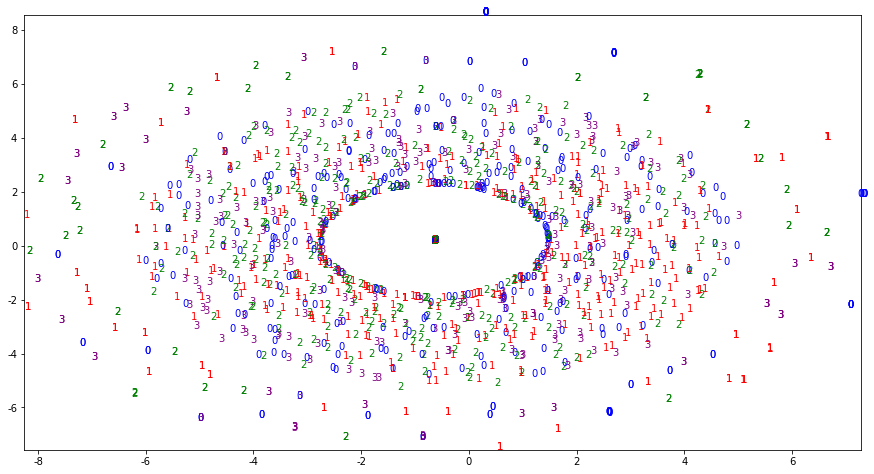

In [41]:
tsne_graph(X_train_tsne, y_train)

In [42]:
tsne = TSNE(n_components=2, init='random', random_state=7)
X_train_tsne = tsne.fit_transform(X_train_lsa)

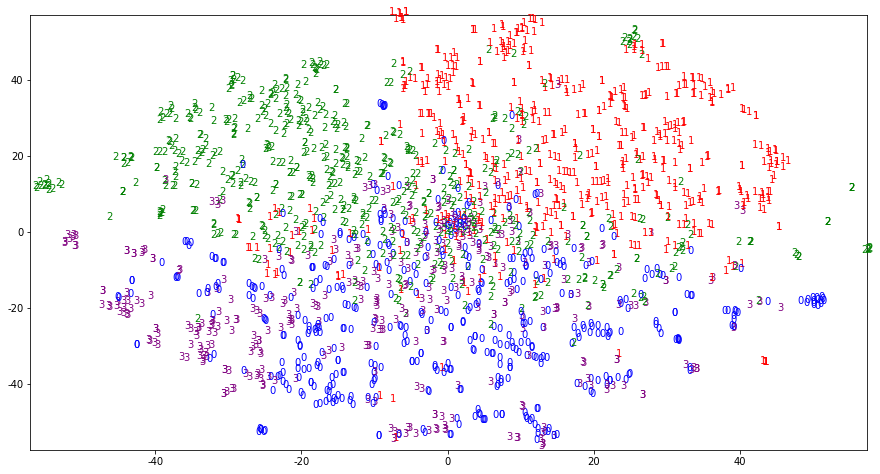

In [43]:
tsne_graph(X_train_tsne, y_train)